In [1]:
import pandas as pd
import numpy as np
import os
import glob

In [2]:
def get_files(filepath):
    all_files=[]
    for root,dirs,files in os.walk(filepath):
        files=glob.glob(os.path.join(root,"json"))
        for f in files:
            all_files.append(os.path.abspath(f))
            
    return all_files
        

In [3]:
import os # for manipulates files and subdirectories
import json # handle json files

json_folder_path = os.path.join("Dashboard")
# In order to get the list of all files that ends with ".json"
# we will get list of all files, and take only the ones that ends with "json"
json_files = [ x for x in os.listdir(json_folder_path) if x.endswith("json") ]
json_data = list()
for json_file in json_files:
    json_file_path = os.path.join(json_folder_path, json_file)
    with open (json_file_path, "r") as f:
        json_data.append(json.load(f))

In [4]:
json_data

[{'user': {'Passive': {'Looking at': {'Charachter': ['Charile',
      'Adam',
      'Charile'],
     'Enviornment': {'Real': ['Chair', 'Mail', 'Box'],
      'Virtual': ['Fridge', 'Mask', 'Clip']}},
    'Idle': 100},
   'Active': {'Play': 80, 'Solve': {'Achieve': 3, 'Failed': 2}}}},
 {'user': {'Passive': {'Looking at': {'Charachter': ['Adam',
      'Charile',
      'Adam',
      'Charile'],
     'Enviornment': {'Real': ['Chair', 'Chair', 'Mail'],
      'Virtual': ['Fridge', 'Mask', 'Synerige']}},
    'Idle': 80},
   'Active': {'Play': 100, 'Solve': {'Achieve': 2, 'Failed': 3}}}},
 {'user': {'Passive': {'Looking at': {'Charachter': ['Charile',
      'Charile',
      'Charile'],
     'Enviornment': {'Real': ['Chair', 'Mail'],
      'Virtual': ['Synerige', 'Desk', 'Clip']}},
    'Idle': 100},
   'Active': {'Play': 120, 'Solve': {'Achieve': 1, 'Failed': 4}}}},
 {'user': {'Passive': {'Looking at': {'Charachter': ['Adam', 'Adam', 'Adam'],
     'Enviornment': {'Real': ['Chair', 'Chair'],
     

In [5]:
user=pd.DataFrame()

In [6]:
user

""


In [7]:
charachters=[]
real=[]
virtual=[]
play=[]
achieve=[]
failed=[]
idle=[]
for i in range(len(json_data)):
    charachters.append(json_data[i]['user']['Passive']['Looking at']['Charachter'])
    real.append(json_data[i]['user']['Passive']['Looking at']['Enviornment']['Real'])
    virtual.append(json_data[i]['user']['Passive']['Looking at']['Enviornment']['Virtual'])
    play.append(json_data[i]['user']['Active']['Play'])
    achieve.append(json_data[i]['user']['Active']['Solve']['Achieve'])
    failed.append(json_data[i]['user']['Active']['Solve']['Failed'])
    idle.append(json_data[i]['user']['Passive']['Idle'])

In [8]:
user['Charachters']=charachters
user['Real']=real
user['Virtual']=virtual
user['Play']=play
user['Achieve']=achieve
user['Failed']=failed
user['Idle']=idle

In [9]:
user

,Charachters,Real,Virtual,Play,Achieve,Failed,Idle
0,"[Charile, Adam, Charile]","[Chair, Mail, Box]","[Fridge, Mask, Clip]",80,3,2,100
1,"[Adam, Charile, Adam, Charile]","[Chair, Chair, Mail]","[Fridge, Mask, Synerige]",100,2,3,80
2,"[Charile, Charile, Charile]","[Chair, Mail]","[Synerige, Desk, Clip]",120,1,4,100
3,"[Adam, Adam, Adam]","[Chair, Chair]","[Fridge, Mask, Busnen Burner, Flask]",30,5,0,20
4,"[Adam, Charile, Adam]","[Chair, Chair]","[Fridge, Mask, Clip]",60,4,1,60


<AxesSubplot:>

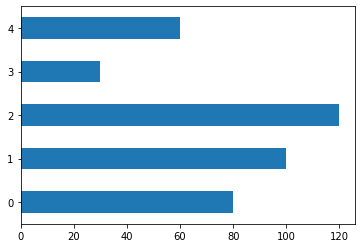

In [11]:
user['Play'].plot(kind='barh')

In [12]:
user_passive=user.sort_values('Idle',ascending=False)

<AxesSubplot:>

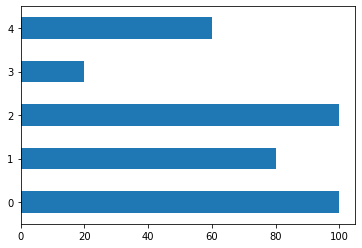

In [13]:
user_passive['Idle'].plot(kind='barh')

In [14]:
user_leaderboard=user[['Achieve']]

In [15]:
user_leaderboard=user_leaderboard.sort_values('Achieve',ascending=False)

In [16]:
user_leaderboard

,Achieve
3,5
4,4
0,3
1,2
2,1


In [17]:
user.Achieve.sum()

15

In [18]:
user.Failed.sum()

10

In [19]:
total=len(user.Achieve)*5

In [20]:
total

25

In [21]:
percent_success=(user.Achieve.sum()/len(user.Achieve)*5)*100

In [22]:
percent_failure=(user.Failed.sum()/len(user.Achieve)*5)*100

In [23]:
import matplotlib.pyplot as plt

In [24]:
pieplot=[percent_success,percent_failure]

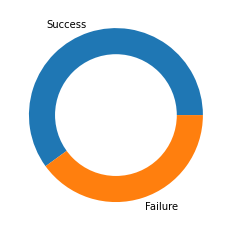

In [25]:
plt.pie(pieplot,labels=['Success','Failure'])
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

In [26]:
real_value=user['Real'].apply(lambda row :len(row))
virutal_value=user['Virtual'].apply(lambda row :len(row))

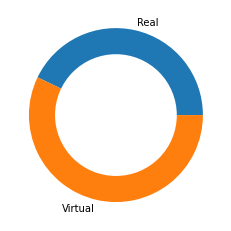

In [27]:
itemplot=[real_value.sum(),virutal_value.sum()]
plt.pie(itemplot,labels=['Real','Virtual'])
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

In [28]:
Charile=[]
Adam=[]
ccount=0
acount=0
for index, row in user.iterrows():
    for r in row['Charachters']:
        if r=='Adam':
            acount+=1
        else:
            ccount+=1
    Adam.append(acount)
    Charile.append(ccount)
    acount=0
    ccount=0

In [29]:
Charile

[2, 2, 3, 0, 1]

In [30]:
D={'Charile':sum(Charile),
         'Adam':sum(Adam)}

([<matplotlib.axis.XTick at 0x1f5903f6310>,
 [Text(0, 0, 'Charile'), Text(1, 0, 'Adam')])

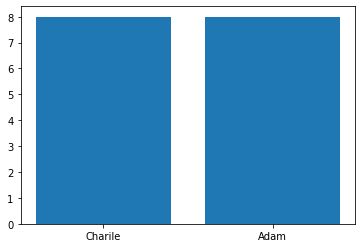

In [31]:
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

In [34]:
import hvplot.pandas 
import panel as pn

ModuleNotFoundError: No module named 'channels'

In [ ]:
!pip install channels